# **Importing Dataset & Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df_train=pd.read_csv('Customer_Segmentation_train.csv')
df_test=pd.read_csv('Customer_Segmentation_test.csv')

In [4]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


**Combining Train And Test Data for EDA**

In [6]:
df=pd.concat([df_train,df_test])

In [7]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
df.shape

(10695, 11)

In [9]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [11]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,190
Age,0
Graduated,102
Profession,162
Work_Experience,1098
Spending_Score,0
Family_Size,448
Var_1,108


Distribution of gender

/tmp/ipython-input-12-3469130454.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette=['skyblue', 'lightcoral']) # Changed palette to a list of colors


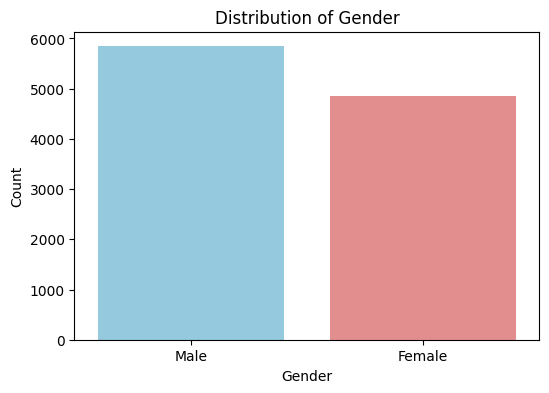

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to avoid potential issues with seaborn reindexing
df = df.reset_index(drop=True)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette=['skyblue', 'lightcoral']) # Changed palette to a list of colors
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Distribution of Ever Married

/tmp/ipython-input-13-1773423498.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ever_Married', palette='viridis') # Added palette


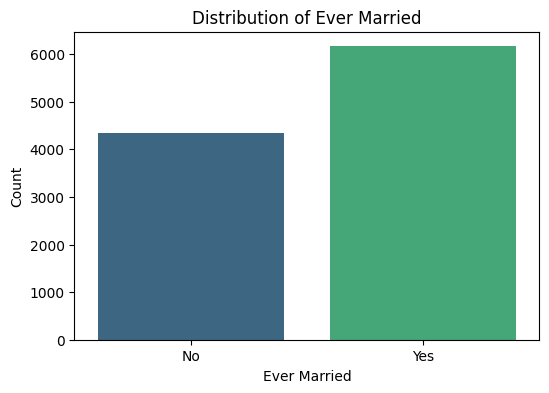

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to avoid potential issues with seaborn reindexing
df = df.reset_index(drop=True)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Ever_Married', palette='viridis') # Added palette
plt.title('Distribution of Ever Married')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.show()

Distribution of Age

/tmp/ipython-input-14-1296335237.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Age', kde=True, palette='plasma') # Added palette


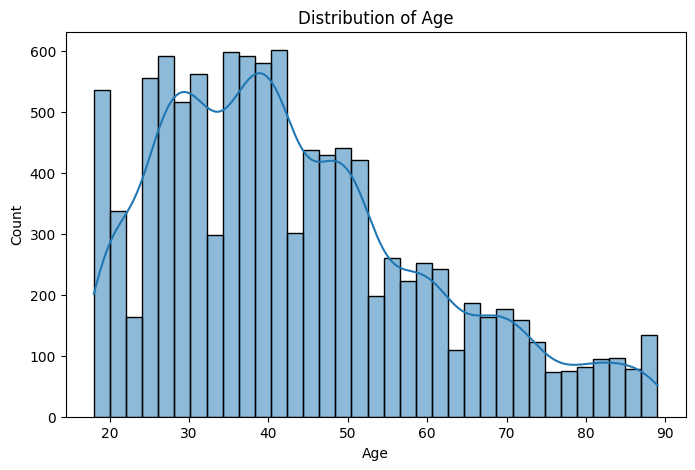

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, palette='plasma') # Added palette
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Distribution of Graduated

/tmp/ipython-input-15-3128248766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Graduated', palette='magma') # Added palette


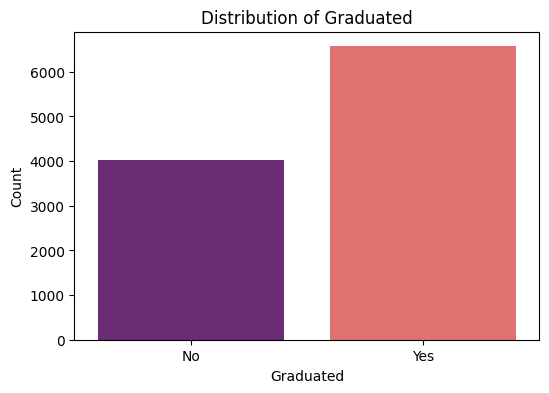

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Graduated', palette='magma') # Added palette
plt.title('Distribution of Graduated')
plt.xlabel('Graduated') # Assuming 0/1 encoding and NaN for Unknown
plt.ylabel('Count')
plt.show()

Distribution of Profession

/tmp/ipython-input-16-1516172602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Profession', palette='cividis') # Added palette


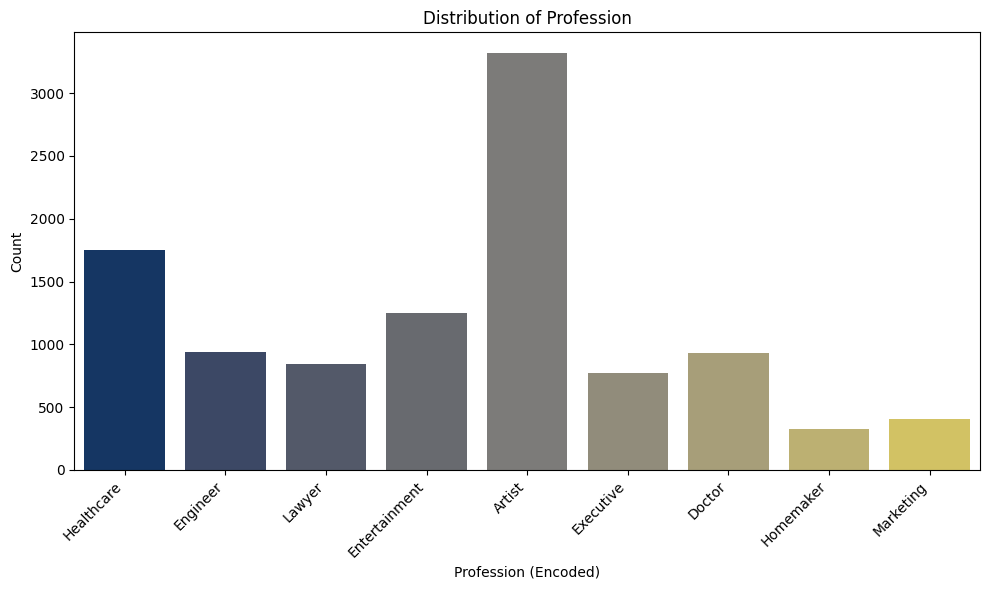

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Profession', palette='cividis') # Added palette
plt.title('Distribution of Profession')
plt.xlabel('Profession (Encoded)') # Indicate that it's encoded
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Distribution of Work_Experience

/tmp/ipython-input-17-1595955398.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Work_Experience', kde=True, palette='inferno') # Added palette


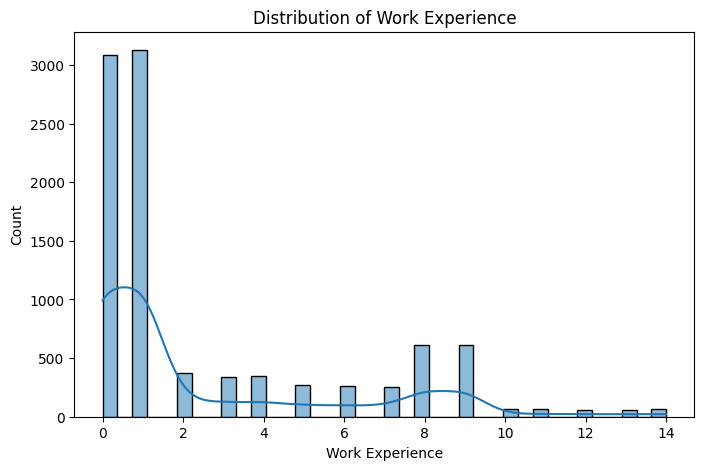

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Work_Experience', kde=True, palette='inferno') # Added palette
plt.title('Distribution of Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Count')
plt.show()

Distribution of Spending_Score

/tmp/ipython-input-18-3852890022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Spending_Score', palette='rocket') # Added palette


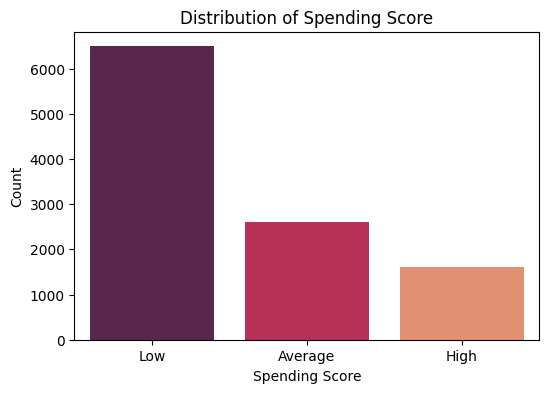

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Spending_Score', palette='rocket') # Added palette
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score') # Assuming 0/1/2 encoding
plt.ylabel('Count')
plt.show()

Distribution of Family_Size

/tmp/ipython-input-19-4123930176.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='Family_Size', kde=True, palette='flare') # Added palette


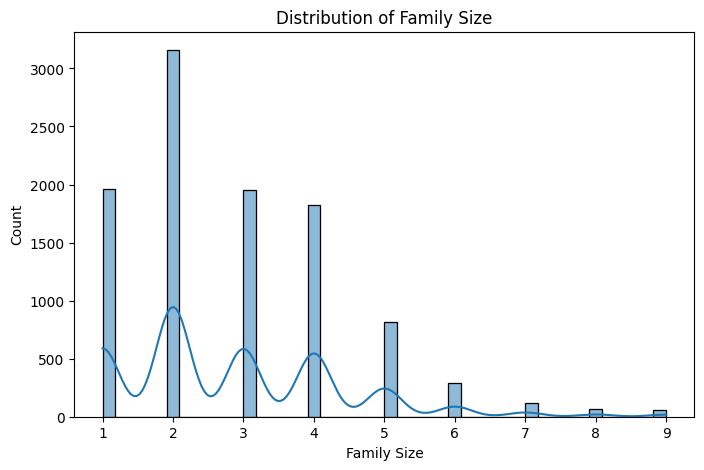

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Family_Size', kde=True, palette='flare') # Added palette
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

Distribution of Segmentation

/tmp/ipython-input-20-2137472775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Segmentation', palette='flare') # Added palette


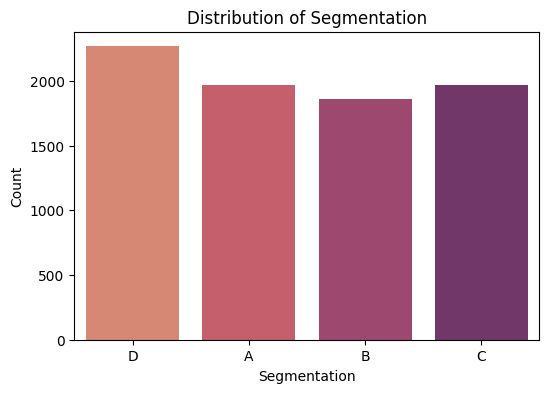

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Segmentation', palette='flare') # Added palette
plt.title('Distribution of Segmentation')
plt.xlabel('Segmentation') # Assuming 0/1/2/3 encoding
plt.ylabel('Count')
plt.show()

# **EDA**

In [21]:
df['Work_Experience'].unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [22]:
df['Work_Experience']=df['Work_Experience'].fillna(df['Work_Experience'].mode(),inplace=True)

/tmp/ipython-input-22-1965562136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience']=df['Work_Experience'].fillna(df['Work_Experience'].mode(),inplace=True)


In [23]:
df['Family_Size']=df['Family_Size'].fillna(df['Family_Size'].median(),inplace=True)

/tmp/ipython-input-23-4009453349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family_Size']=df['Family_Size'].fillna(df['Family_Size'].median(),inplace=True)


In [24]:
df['Graduated']=df['Graduated'].fillna('Unknown', inplace=True)

/tmp/ipython-input-24-3725432262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Graduated']=df['Graduated'].fillna('Unknown', inplace=True)


In [25]:
df['Graduated'].value_counts()

,count
Graduated,


In [26]:
df['Profession'].fillna(df['Profession'].mode()[0],inplace=True)

/tmp/ipython-input-26-3178589317.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna(df['Profession'].mode()[0],inplace=True)


In [27]:
df['Var_1'].fillna(df['Var_1'].mode()[0],inplace=True)

/tmp/ipython-input-27-1869859172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Var_1'].fillna(df['Var_1'].mode()[0],inplace=True)


In [28]:
df['Ever_Married'].fillna(df['Ever_Married'].mode()[0],inplace=True)

/tmp/ipython-input-28-2499603533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ever_Married'].fillna(df['Ever_Married'].mode()[0],inplace=True)


In [29]:
df['Segmentation'].fillna(df['Segmentation'].mode()[0],inplace=True)

/tmp/ipython-input-29-3278745893.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Segmentation'].fillna(df['Segmentation'].mode()[0],inplace=True)


In [30]:
df.drop(['ID'],axis=1,inplace=True)

In [31]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
df['Gender'] = df['Gender'].map({'Male':0,'Female':1})

In [33]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,No,22,None,Healthcare,None,Low,None,Cat_4,D
1,1,Yes,38,None,Engineer,None,Average,None,Cat_4,A
2,1,Yes,67,None,Engineer,None,Low,None,Cat_6,B
3,0,Yes,67,None,Lawyer,None,High,None,Cat_6,B
4,1,Yes,40,None,Entertainment,None,High,None,Cat_6,A


In [34]:
df['Ever_Married']=df['Ever_Married'].map({'Yes':1,'No':0})

In [35]:
df['Graduated']=df['Graduated'].map({'Yes':1,'No':0})

In [36]:
df['Profession']=df['Profession'].map({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7})

In [37]:
df['Spending_Score']=df['Spending_Score'].map({'Low':0,'Average':1,'High':2})

In [38]:
df['Segmentation']=df['Segmentation'].map({'A':0,'B':1,'C':2,'D':3})

In [39]:
df.drop(['Var_1'],axis=1,inplace=True)

In [40]:
df.dtypes

,0
Gender,int64
Ever_Married,int64
Age,int64
Graduated,float64
Profession,float64
Work_Experience,object
Spending_Score,int64
Family_Size,object
Segmentation,int64


In [41]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0,0,22,NaN,1.0,None,0,None,3
1,1,1,38,NaN,3.0,None,1,None,0
2,1,1,67,NaN,3.0,None,0,None,1
3,0,1,67,NaN,5.0,None,2,None,1
4,1,1,40,NaN,2.0,None,2,None,0


# **K-Means Clustering**

In [42]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
# Define X by selecting the relevant columns from df
X = df[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score', 'Gender', 'Ever_Married', 'Graduated']].copy()

# Handle any remaining missing values in X using SimpleImputer
# Use median strategy for numerical columns
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit the imputer on X and transform X to fill missing values
X_imputed = imputer.fit_transform(X)

# Convert the imputed numpy array back to a pandas DataFrame to keep column names if needed later
# Although for KMeans fitting, the numpy array X_imputed is sufficient
# X = pd.DataFrame(X_imputed, columns=X.columns)


# Now fit KMeans on the imputed data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10) # Added n_init
y_kmeans = kmeans.fit_predict(X_imputed) # Fit on the imputed data

print("First 10 cluster assignments:")
print(y_kmeans[:10])

First 10 cluster assignments:
[0 2 3 3 2 1 0 2 1 1]


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Work_Experience' 'Family_Size' 'Graduated']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


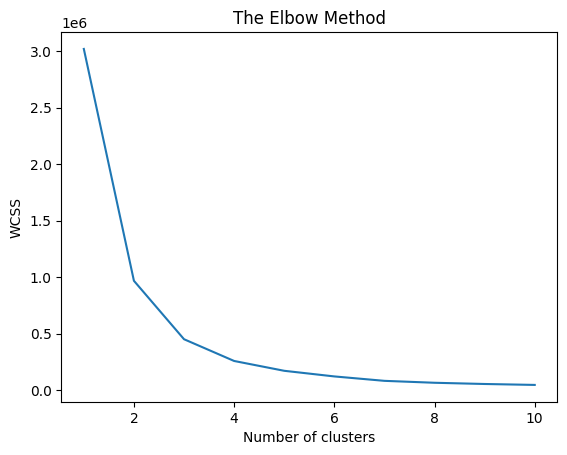

In [43]:
# Assuming X_imputed is available from the previous step

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # Added n_init for clarity
    kmeans.fit(X_imputed) # Use the imputed data
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

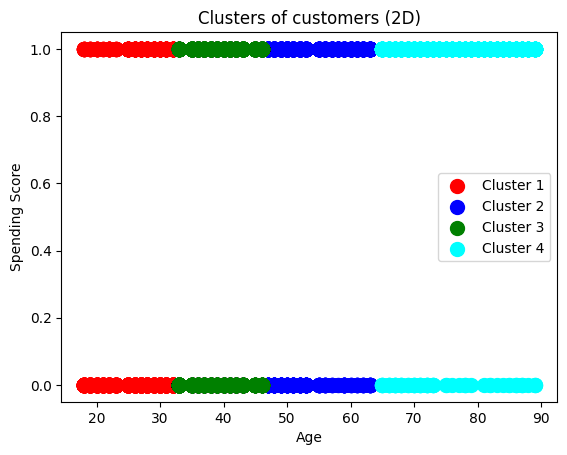

In [44]:
# Assuming X_imputed and y_kmeans are available from the previous steps
# Plotting the clusters - using 'Age' (index 0) and 'Spending_Score' (index 3) as example features
plt.scatter(X_imputed[y_kmeans==0, 0], X_imputed[y_kmeans==0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_imputed[y_kmeans==1, 0], X_imputed[y_kmeans==1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_imputed[y_kmeans==2, 0], X_imputed[y_kmeans==2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_imputed[y_kmeans==3, 0], X_imputed[y_kmeans==3, 3], s = 100, c = 'cyan', label = 'Cluster 4')


plt.title('Clusters of customers (2D)')
plt.xlabel('Age') # Updated label
plt.ylabel('Spending Score') # Updated label
plt.legend()
plt.show()

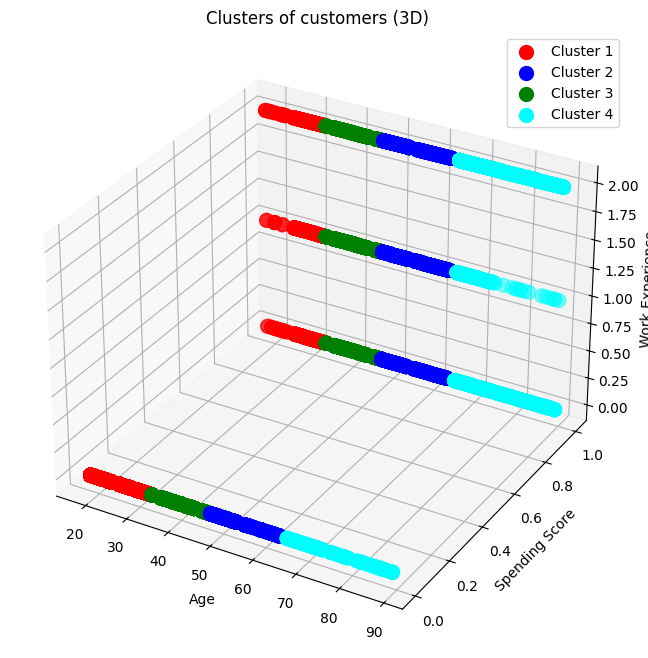

In [45]:
from mpl_toolkits.mplot3d import Axes3D
# Assuming X_imputed and y_kmeans are available from the previous steps

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters in 3D - using 'Age', 'Spending_Score', and 'Work_Experience' as example features
# Indexing: 0='Age', 3='Spending_Score', 1='Work_Experience'
ax.scatter(X_imputed[y_kmeans==0, 0], X_imputed[y_kmeans==0, 3], X_imputed[y_kmeans==0, 1], s = 100, c = 'red', label = 'Cluster 1')
ax.scatter(X_imputed[y_kmeans==1, 0], X_imputed[y_kmeans==1, 3], X_imputed[y_kmeans==1, 1], s = 100, c = 'blue', label = 'Cluster 2')
ax.scatter(X_imputed[y_kmeans==2, 0], X_imputed[y_kmeans==2, 3], X_imputed[y_kmeans==2, 1], s = 100, c = 'green', label = 'Cluster 3')
ax.scatter(X_imputed[y_kmeans==3, 0], X_imputed[y_kmeans==3, 3], X_imputed[y_kmeans==3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

ax.set_title('Clusters of customers (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Work Experience')
ax.legend()

plt.show()